# Прогнозирование оттока пользователей для сети фитнес-центров «Культурист-датасаентист» <a class="tocSkip">

**Содержание**

1 [Описание проекта](#description)  
2 [Общая информация](#start)  
3 [Подготовка данных](#preprocessing)  
4 [Исследовательский анализ данных](#eda)    
5 [Модель прогнозирования оттока клиентов](#predictive_model)  
6 [Кластеризация клиентов](#clustering)  
7 [Выводы и рекомендации](#conclusion)   

## Описание проекта <a id="description"></a> 

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.  
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.  
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.  
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.  
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.  
А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;  
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;  
* проанализировать основные признаки, наиболее сильно влияющие на отток;  
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:  
1) выделить целевые группы клиентов;  
2) предложить меры по снижению оттока;  
3) определить другие особенности взаимодействия с клиентами.  

**План работ**

**Шаг 1. Загрузить данные**  
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
* 'Churn' — факт оттока в текущем месяце;
* Данные клиента за предыдущий до проверки факта оттока месяц:
    * `gender` — пол;
    * `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
    * `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    * `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    * `Phone` — наличие контактного телефона;
    * `Age` — возраст;
    * `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
* Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    * `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    * `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
    * `Group_visits` — факт посещения групповых занятий;
    * `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
    * `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
    * `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.
Путь к файлу: /datasets/gym_churn.csv

**Шаг 2. Провести исследовательский анализ данных (EDA)**
* Посмотреть на датасет: есть ли в нем отсутствующие признаки, изучить средние значения и стандартные отклонения (пригодится метод `describe()`);
* Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом `groupby()`);
* Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
* Построить матрицу корреляций и отобразить её.

**Шаг 3. Постротить модель прогнозирования оттока клиентов**
* Построить модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
* Разбить данные на обучающую и валидационную выборку функцией `train_test_split()`.
* Обучить модель на train-выборке двумя способами:
    * логистической регрессией,
    * случайным лесом.
* Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнить по ним модели. Какая модель показала себя лучше на основании метрик?

**Шаг 4. Сделайте кластеризацию клиентов**
Отложить в сторону столбец с оттоком и провести кластеризацию объектов (клиентов):
* Стандартизировать данные.
* Построить матрицу расстояний функцией `linkage()` на стандартизованной матрице признаков и нарисовать дендрограмму. На основании полученного графика предположить, какое количество кластеров можно выделить.
* Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов.
* Посмотреть на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
* Построить распределения признаков для кластеров. Можно ли что-то заметить по ним?
* Для каждого полученного кластера посчитать долю оттока (методом `groupby()`). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

**Шаг 5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами**
Сформулировать основные выводы и предложить рекомендации для стратегии взаимодействия с клиентами и их удержания.

## Общая информация <a id="start"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
sns.set_style("dark") 

Загрузим данные о клиентах сети фитнес-центров и рассмотрим общую информацию о таблице.

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


### Вывод <a class="tocSkip">
В таблице хранятся 4000 записей о клиентах, пропуски в данных отсутствуют. Все данные имеют числовой формат.  
План подготовки данных для анализа:
* названия столбцов привести к нижнему регистру,
* данные в столбце `month_to_end_contract` преобразовать в целые числа.

## Подготовка данных  <a id="preprocessing"></a>

Приведем названия столбцов к нижнему регистру.

In [4]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Срок до окончания текущего действующего абонемента в месяцах преобразуем в целые числа.

In [5]:
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null int64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 437.6 KB


Проверим отсутствие дублей в столбцах, содержащих категориальные данные.

In [6]:
for column in df.drop(['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month'], axis=1).columns:
    print(column, df[column].unique())

gender [1 0]
near_location [1 0]
partner [1 0]
promo_friends [1 0]
phone [0 1]
contract_period [ 6 12  1]
group_visits [1 0]
month_to_end_contract [ 5 12  1  6  3 10 11  9  4  7  8  2]
churn [0 1]


In [7]:
df.duplicated().sum()

0

Дубликаты отсутствуют.

### Вывод <a class="tocSkip">
Привели названия столбцов к нижнему регистру и изменили тип поля `month_to_end_contract` на целочисленный. 

## Исследовательский анализ данных <a id="eda"></a>

Изучим средние значения и стандартные отклонения.

In [8]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Портрет среднестатистического клиента:
* 29 лет,
* есть в наличии контактный телефон,
* живет или работает в районе фитнес-клуба,
* впервые в фитнес-клуб обратился 3 месяца назад, 
* текущий абонемент приобрел на 1 месяц,
* посещает спортзал 1 или 2 в неделю,
* не посещал групповые занятия,
* выручка от других услуг фитнес-центра = 147,
* в следующем месяце не покинет фитнес-клуб.

Половина всех признаков, как и целевая переменная - бинарные величины. Среди остальных признаков наибольшим стандартным отклонением обладает `avg_additional_charges_total` (суммарная выручка от других услуг фитнес-центра) - 96, при среднем значении 147. Аномальных значений в данных нет.

Рассмотрим средние значения для групп пользователей, ушедших в отток, и оставшихся.

In [9]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Можно сказать, что клиенты, проживающие или работающие в районе фитнес-центра, являющиеся сотрудниками компании-партнера, или записавшиеся в рамках акции «приведи друга», посещающие групповые занятия, скорее всего более мотивированы в посещении фитнес-клуба, доля таких клиентов выше среди оставшихся клиентов, чем в ушедших в отток. Но наиболее весомые различия в средних значениях между группами наблюдаются в длительности абонемента, сроке до окончания действующего абонемента, времени с момента первого посещения клуба, средней частоте посещений в неделю общей и за последний месяц - для клиентов ушедших в отток эти показатели в несколько раз меньше, чем у оставшихся.

Рассмотрим распределение признаков для групп клиентов, ушедших в отток ('churn' = 1), и оставшихся ('churn' = 0).

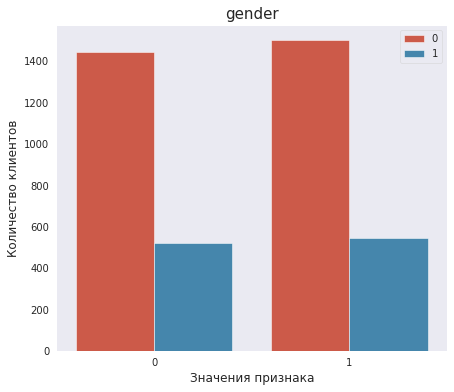

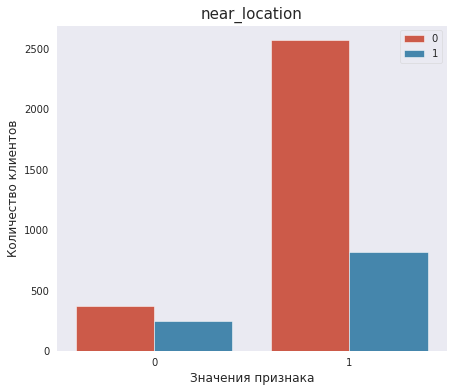

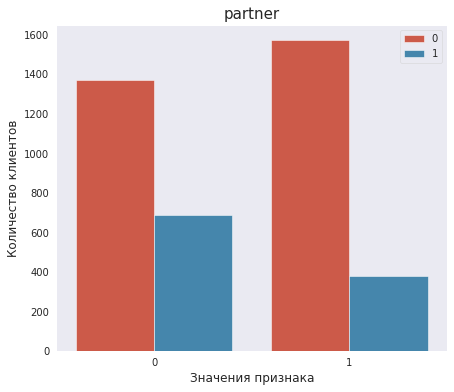

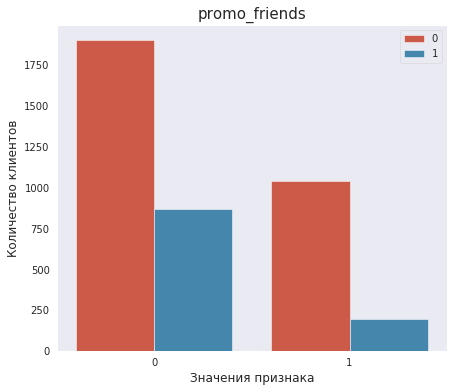

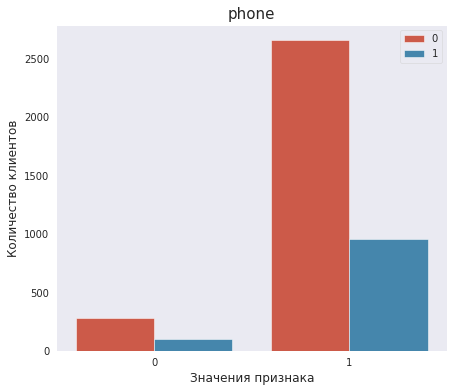

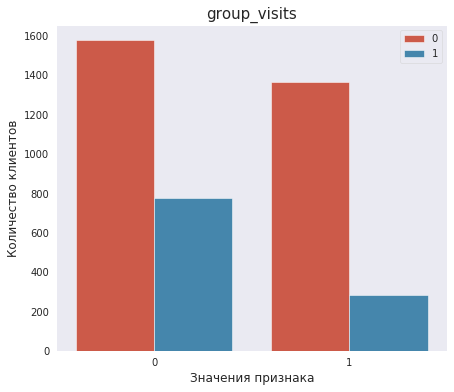

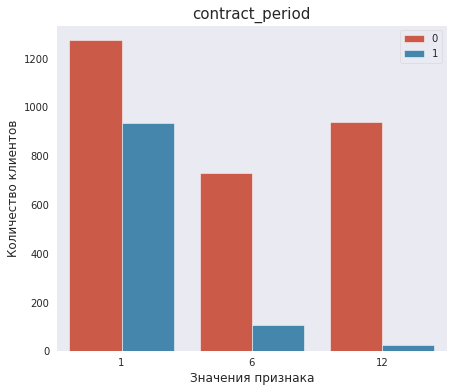

In [10]:
categorical_columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone',
                   'group_visits', 'contract_period']
for col in categorical_columns:
    plt.figure(figsize=(7, 6))
    
    fig = sns.countplot(x=col, hue='churn', data=df)
    
    plt.title(label = col, fontsize = 15)
    plt.ylabel('Количество клиентов', fontsize = 12)
    plt.xlabel('Значения признака', fontsize = 12)
    plt.legend()
    plt.show()

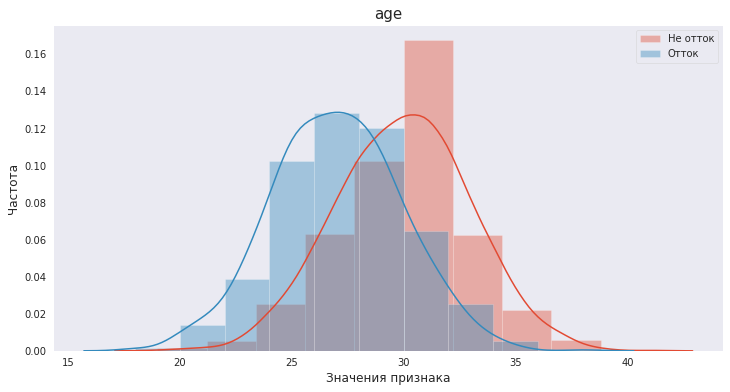

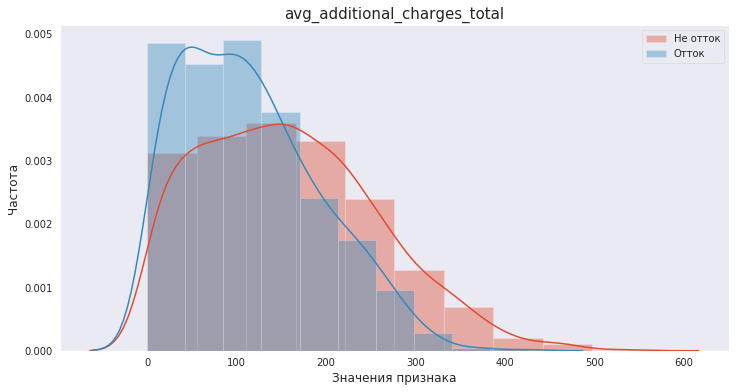

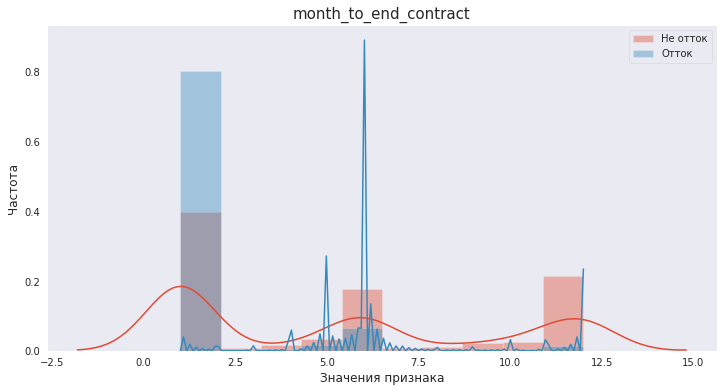

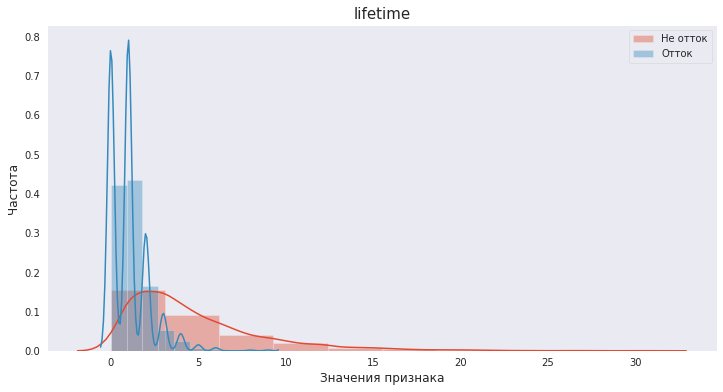

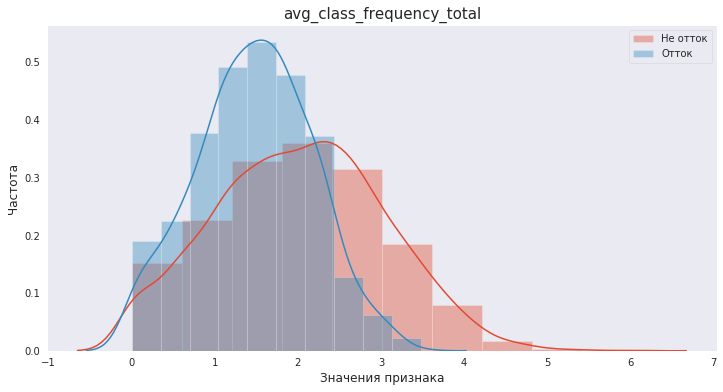

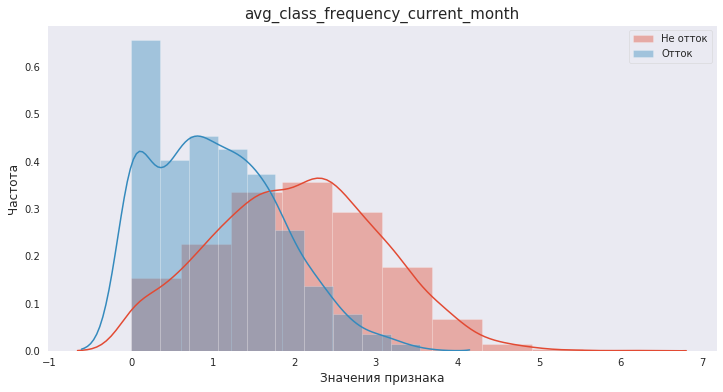

In [11]:
quantitative_columns = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month']
for col in quantitative_columns:
    plt.figure(figsize=(12, 6))
    
    sns.distplot(df.query('churn==0')[col], bins = 10, label='Не отток')
    sns.distplot(df.query('churn==1')[col], bins = 10, label='Отток')
    
    plt.title(label = col, fontsize = 15)
    plt.ylabel('Частота', fontsize = 12)
    plt.xlabel('Значения признака', fontsize = 12)
    plt.legend()
    plt.show()

Судя по графикам:
* среди клиентов с годовым абонементом значительно меньше ушедших в отток, 
* клиенты посещающие фитнес-клуб больше года и клиенты, которые тренируются больше 4 раз в неделю, редко уходят в отток.

Построим и отрисуем матрицу корреляций.

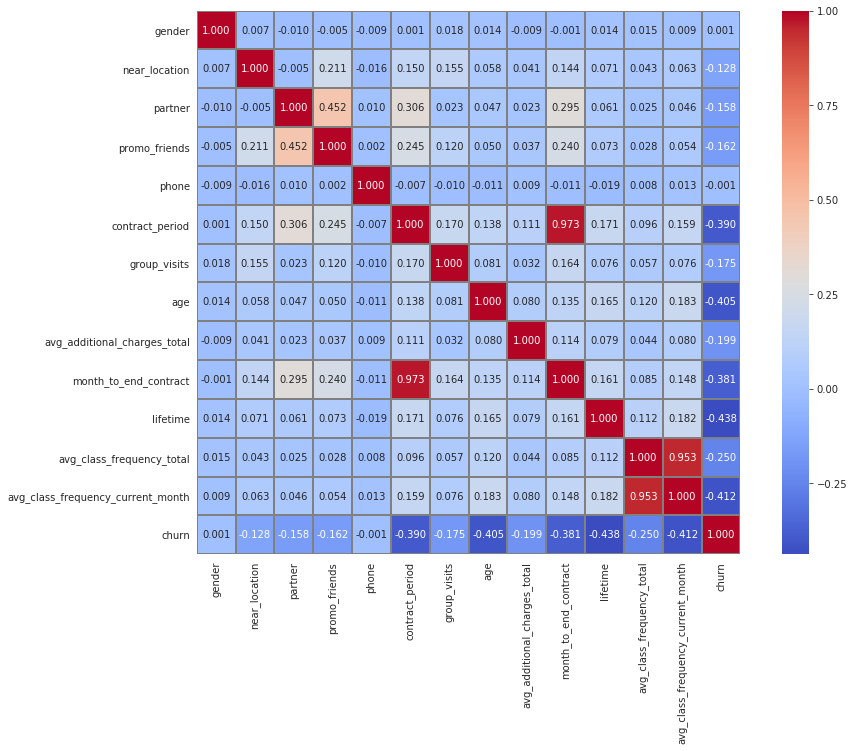

In [12]:
cm = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot = True, square=True, fmt='.3f', linewidths=1, linecolor='gray', cmap= 'coolwarm')
plt.show()

Больше всего с целевой переменной коррелируют `lifetime`, `avg_class_frequency_current_month`, `age`, `contract_period`, `month_to_end_contract`, корреляция при этом отрицательная.   

Некоторые признаки сильно коррелируют друг с другом: `month_to_end_contract` и `contract_period` - 0,97, `avg_class_frequency_current_month` и  `avg_class_frequency_total` - 0,95. Попробуем создать на их основе новые признаки и записать в новую альтернативную таблицу с данными, удалив при этом коррелирующие признаки. 

In [13]:
df_no_corr_features = df.copy()

На основе длительности текущего абонемента в месяцах и срока до окончания действующего абонемента в месяцах создадим новое поле `contract_period_tr`, значения которого будут уникальными для каждой пары `contract_period` + `month_to_end_contract`.

In [14]:
df_no_corr_features['contract_period_tr'] = df_no_corr_features['contract_period'] * 100 + df_no_corr_features['month_to_end_contract']

Среднюю частоту посещений в неделю за весь период и среднюю частоту посещений в неделю за предыдущий месяц заменим на изменение средней частоты посещений в неделю за предыдущий месяц по сравнению с частотой за весь период.

In [15]:
df_no_corr_features['avg_class_frequency_change'] = df_no_corr_features['avg_class_frequency_total'] - df_no_corr_features['avg_class_frequency_current_month']

Рассмотрим как изменилась матрица корреляций.

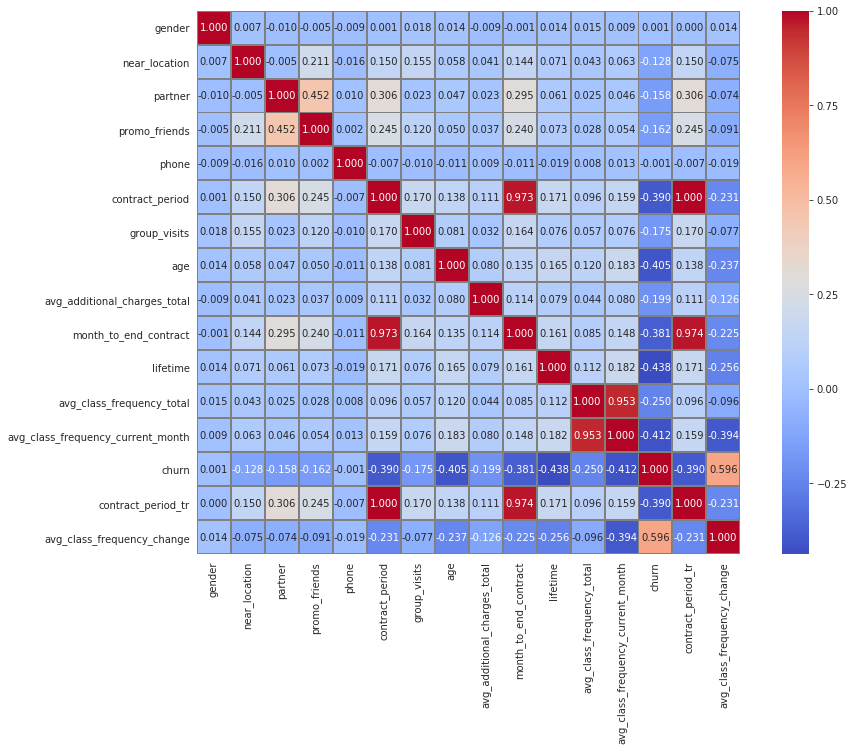

In [16]:
cm = df_no_corr_features.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot = True, square=True, fmt='.3f', linewidths=1, linecolor='gray', cmap= 'coolwarm')
plt.show()

Изменения средней частоты посещений больше других признаков коррелирует с целевой переменной, коэффициент корреляции = 0,596. Если клиент стал реже посещать спортзал, то скорее всего он скоро покинет фитнес-клуб.  
Коэффициент корреляции нового поля `contract_period_tr` такой же, как у его составляющих = -0,39.

Удалим из новой таблицы скоррелированные признаки и признаки, не влияющие на отток клиентов - `gender`, `phone`.

In [17]:
df_no_corr_features = df_no_corr_features.drop(['month_to_end_contract', 'contract_period', 
                                                'avg_class_frequency_current_month', 'avg_class_frequency_total', 
                                                'gender', 'phone'], axis=1)
df_no_corr_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
near_location                   4000 non-null int64
partner                         4000 non-null int64
promo_friends                   4000 non-null int64
group_visits                    4000 non-null int64
age                             4000 non-null int64
avg_additional_charges_total    4000 non-null float64
lifetime                        4000 non-null int64
churn                           4000 non-null int64
contract_period_tr              4000 non-null int64
avg_class_frequency_change      4000 non-null float64
dtypes: float64(2), int64(8)
memory usage: 312.6 KB


### Вывод <a class="tocSkip">
Изучены средние значения и стандартные отклонения признаков, средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался; построены диаграммы распределения признаков для тех, кто ушёл и тех, кто остался; построена матрицу корреляций.  
    
Среди признаков не обнаружены яркие выбросы.  
    
Исходя из корреляций наиболее ценными признаками для модели будут:  
* время с момента первого посещения фитнес-клуба,   
* средняя частота посещений в неделю за предыдущий месяц,  
* возраст,   
* длительность текущего действующего абонемента,   
* срок до окончания текущего действующего абонемента.   
    
На основе сильно скоррелированных признаков созданы новые поля и сохранены в таблице `df_no_corr_features`:
* На основе длительности текущего абонемента в месяцах и срока до окончания действующего абонемента в месяцах создали поле `contract_period_tr`, значения которого уникальны для каждой пары `contract_period` + `month_to_end_contract`.
* Среднюю частоту посещений в неделю за весь период и среднюю частоту посещений в неделю за предыдущий месяц заменили на изменение средней частоты посещений в неделю за предыдущий месяц по сравнению с частотой за весь период. 
    
Из новой таблицы удалили признаки, не влияющие на отток клиентов - `gender`, `phone`.
    
Задача прогнозирования оттока клиентов относится к задачам обучения с учителем: бинарная классификация. Для ее решения выберем алгоритмы **Логистическая регрессия** и **Случайный лес**. Обучим модели и сравним их по метрикам на основе значений прогнозного класса: **accuracy** (доля правильных ответов), **precision** (точность), **recall** (полнота), и метрике для оценки качества модели классификации - **roc_auc**. Так как удержание клиента является приоритетной задачей, то целевой метрикой выберем **recall**: оценим долю найденных классификатором клиентов, ушедших в отток, относительно всех ушедших в отток.

## Модель прогнозирования оттока клиентов <a id="predictive_model"></a>

Определим функцию, которая будет обучать модель и выводить метрики.

In [18]:
def make_prediction(model, data, title = 'Метрики классификации'):
    # разделим данные на признаки (матрица X) и целевую переменную (y)
    X = data.drop(columns = ['churn'])
    y = data['churn']

    # разделяем модель на обучающую и валидационную выборку
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
    
    # создадим объект класса StandardScaler и применим его к обучающей выборке
    scaler = StandardScaler()
    X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

    # применяем стандартизацию к матрице признаков для тестовой выборки
    X_test_st = scaler.transform(X_test)
    
    # обучим модель
    model.fit(X_train_st, y_train)
    # воспользуемся уже обученной моделью, чтобы сделать прогнозы
    y_pred = model.predict(X_test_st)
    # бинарный прогноз
    y_proba = model.predict_proba(X_test_st)[:,1]
    
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_test, y_proba)))

Рассмотрим метрики для моделей, построенных на данных таблицы df.

In [19]:
make_prediction(LogisticRegression(random_state=0), df, title = 'Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
	ROC_AUC: 0.98


In [20]:
make_prediction(RandomForestClassifier(n_estimators = 100, random_state = 0), df, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	ROC_AUC: 0.97


Оценки качества моделей высокие: 0,97 и 0,98, метрики на основе значений прогнозного класса для модели логистической регрессии  чуть выше, чем для модели случайного леса.

Рассмотрим метрики для моделей, построенных на данных таблицы df_no_corr_features.

In [21]:
make_prediction(LogisticRegression(random_state=0), df_no_corr_features, title = 'Метрики для модели логистической регрессии (df_no_corr_features):')

Метрики для модели логистической регрессии (df_no_corr_features):
	Accuracy: 0.93
	Precision: 0.90
	Recall: 0.84
	ROC_AUC: 0.97


Для модели логистической регрессии на 0,01 уменьшились доля правильных ответов и полнота. Заменим используемую по умолчанию l2-регуляризацию на l1. 

In [22]:
make_prediction(LogisticRegression(random_state=0, penalty='l1'), df_no_corr_features, title = 'Метрики для модели логистической регрессии (df_no_corr_features):')

Метрики для модели логистической регрессии (df_no_corr_features):
	Accuracy: 0.93
	Precision: 0.90
	Recall: 0.84
	ROC_AUC: 0.97


Метрики не изменились.

Рассмотрим метрики для модели случайного леса.

In [23]:
make_prediction(RandomForestClassifier(n_estimators = 100, random_state = 0), df_no_corr_features, title = 'Метрики для модели случайного леса (df_no_corr_features):')

Метрики для модели случайного леса (df_no_corr_features):
	Accuracy: 0.95
	Precision: 0.95
	Recall: 0.86
	ROC_AUC: 0.98


Все значения метрик модели случайного леса улучшились на данных без коррелирующих признаков. Метрика `accuracy` повысилась с 0,92 до 0,95. Целевая метрика `recall` увеличилась с 0,83 до 0,86. Проверим, как изменятся показатели при разных количествах деревьев.

In [24]:
make_prediction(RandomForestClassifier(n_estimators = 80, random_state = 0), df_no_corr_features, title = 'Метрики для модели случайного леса (df_no_corr_features, n_estimators = 80):')

Метрики для модели случайного леса (df_no_corr_features, n_estimators = 80):
	Accuracy: 0.95
	Precision: 0.95
	Recall: 0.87
	ROC_AUC: 0.98


In [25]:
make_prediction(RandomForestClassifier(n_estimators = 180, random_state = 0), df_no_corr_features, title = 'Метрики для модели случайного леса (df_no_corr_features, n_estimators = 180):')

Метрики для модели случайного леса (df_no_corr_features, n_estimators = 180):
	Accuracy: 0.95
	Precision: 0.94
	Recall: 0.86
	ROC_AUC: 0.98


In [26]:
make_prediction(RandomForestClassifier(n_estimators = 240, random_state = 0), df_no_corr_features, title = 'Метрики для модели случайного леса (df_no_corr_features, n_estimators = 240):')

Метрики для модели случайного леса (df_no_corr_features, n_estimators = 240):
	Accuracy: 0.95
	Precision: 0.94
	Recall: 0.86
	ROC_AUC: 0.98


Лучшие показатели метрик у модели RandomForestClassifier(n_estimators = 80). Заново обучим эту модель и выведем важность признаков.

In [27]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = df_no_corr_features.drop(columns = ['churn'])
y = df_no_corr_features['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

# обучим финальную модель
final_model = RandomForestClassifier(n_estimators = 80, random_state = 0)
final_model.fit(X_train_st, y_train)
y_pred = final_model.predict(X_test_st)
     
# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
importances = pd.DataFrame({'features': X.columns, 'importances': final_model.feature_importances_})

importances.sort_values(by='importances', ascending=False)

,features,importances
8,avg_class_frequency_change,0.501531
6,lifetime,0.222466
4,age,0.097031
7,contract_period_tr,0.073961
5,avg_additional_charges_total,0.071950
3,group_visits,0.010120
1,partner,0.007904
0,near_location,0.007694
2,promo_friends,0.007344


### Вывод <a class="tocSkip">
Построили модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце, и обучили модель логистической регрессией и случайным лесом.  
Наилучшие метрики дает модель случайного леса, построенная на данных без скоррелированных признаков с числом деревьев = 80. Показатель целевой метрики (полноты) этой модели 0,87.  
Наиболее важными признаками для модели оказались:
* изменение средней частоты посещений в неделю,
* время с момента первого обращения в фитнес-центр, 
* возраст клиента.

## Кластеризация клиентов <a id="clustering"></a>

Разделим данные на признаки (матрица X) и целевую переменную (y) и стандартизируем данные.

In [28]:
X = df.drop(columns = ['churn'])
y = df['churn']

scaler = StandardScaler()
X_st = scaler.fit_transform(X)

In [29]:
print(X_st[:5])

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  1.83194105  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02049263
  -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237  1.83194105 -0.46008079  1.36465509
   1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.78707638
  -0.61454183]]


Построим матрицу расстояний функцией `linkage()` на стандартизованной матрице признаков и нарисуем дендрограмму.

In [30]:
linked = linkage(X_st, method = 'ward')

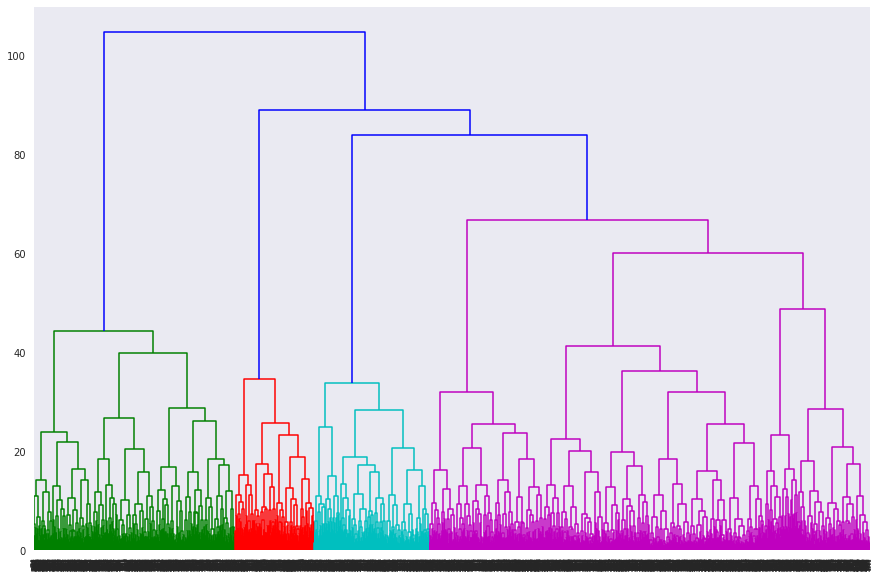

In [31]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

Предложенное оптимальное число кластеров 4.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [32]:
km = KMeans(n_clusters = 5, random_state = 0) # согласно инструкции задаём число кластеров, равное 5 (в жизни - на основании дендрограммы - 4)
labels = km.fit_predict(X_st) # применяем алгоритм к данным и формируем вектор кластеров 

Посчитаем метрику силуэта для кластеризации.

In [33]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_st, labels)))

Silhouette_score: 0.14


Посмотрим на средние значения признаков для кластеров.

In [34]:
df['cluster'] = labels
df.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


Между кластерами практически нет различий в признаках `gender`, `age`. Исключим эти признаки и заново обучим модель.

In [35]:
cluster_df = df.drop(columns = ['gender', 'age'])

X = cluster_df.drop(columns = ['churn'])
y = cluster_df['churn']

scaler = StandardScaler()
X_st = scaler.fit_transform(X)

In [36]:
km = KMeans(n_clusters = 5, random_state = 0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_st) # применяем алгоритм к данным и формируем вектор кластеров 
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_st, labels)))

Silhouette_score: 0.21


Метрика силуэта увеличилась с 0,14 до 0,21, при изменении числа кластеров на 4 метрика будет выше.  
Рассмотрим средние значения признаков для кластеров.

In [37]:
cluster_df['cluster'] = labels
cluster_df.groupby('cluster').mean()

,near_location,partner,promo_friends,phone,contract_period,group_visits,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,
0,0.976471,0.348235,0.227059,0.998824,2.663529,0.467059,162.499837,2.452941,4.849412,2.849947,2.846292,0.082353
1,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
2,1.000000,0.355484,0.241793,1.000000,1.942354,0.344275,130.781077,1.851882,2.446757,1.232018,0.996032,0.509207
3,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
4,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532


Средние значения признаков дают представление об особенностях каждого кластера: например, в 3 кластер входях клиенты, которые не проживают и не работают в районе расположения фитнес-клуба; в кластере 0 - все клиенты не используют или скрывают контактный телефон. Изучим распределения признаков для кластеров.

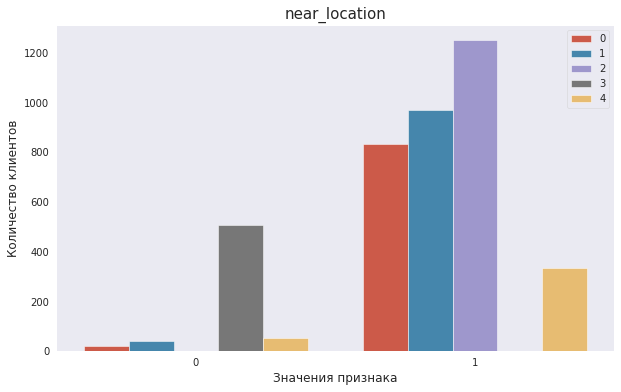

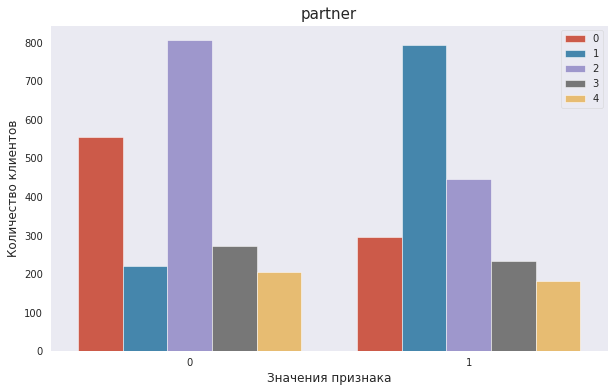

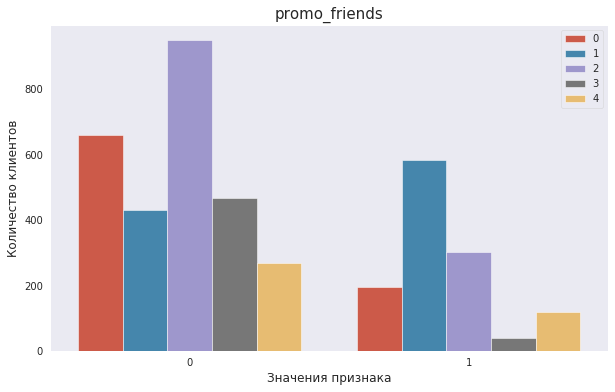

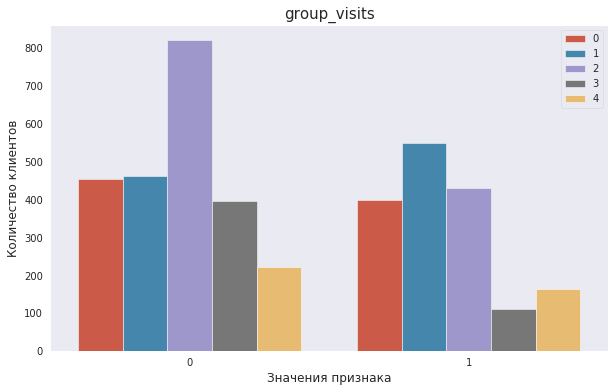

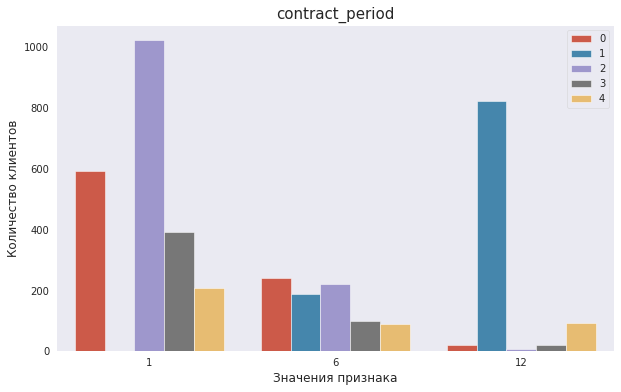

In [38]:
categorical_columns = ['near_location', 'partner', 'promo_friends', 'group_visits', 'contract_period']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    
    fig = sns.countplot(x=col, hue='cluster', data=cluster_df)
    
    plt.title(label = col, fontsize = 15)
    plt.ylabel('Количество клиентов', fontsize = 12)
    plt.xlabel('Значения признака', fontsize = 12)
    plt.legend()
    plt.show()

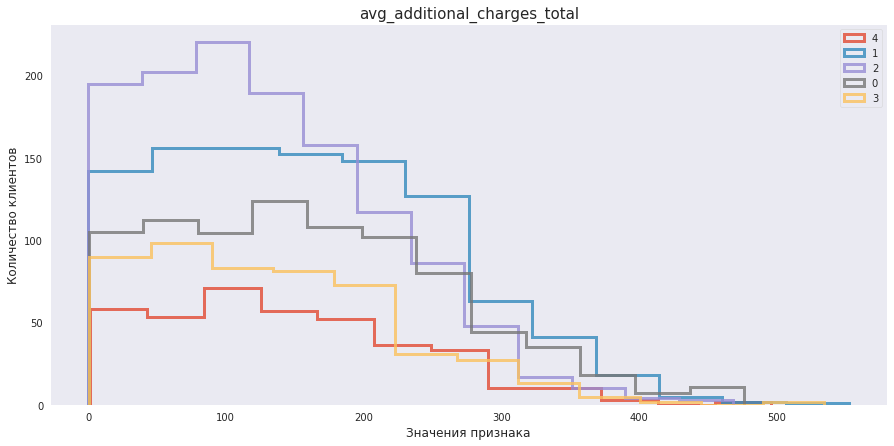

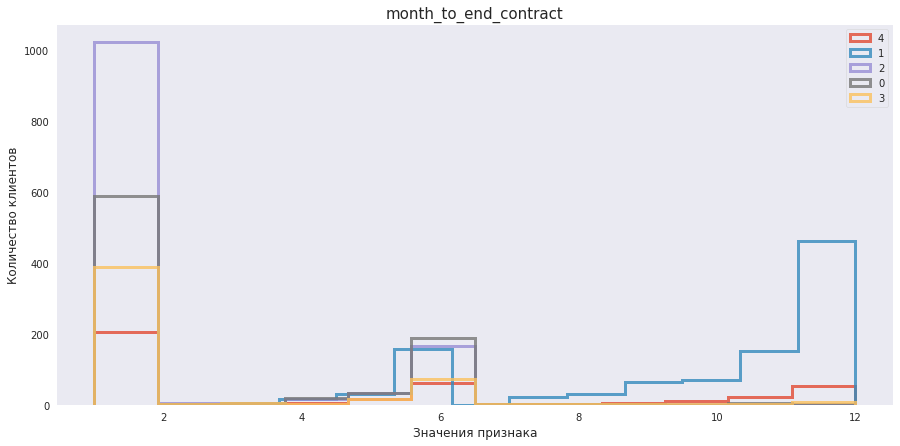

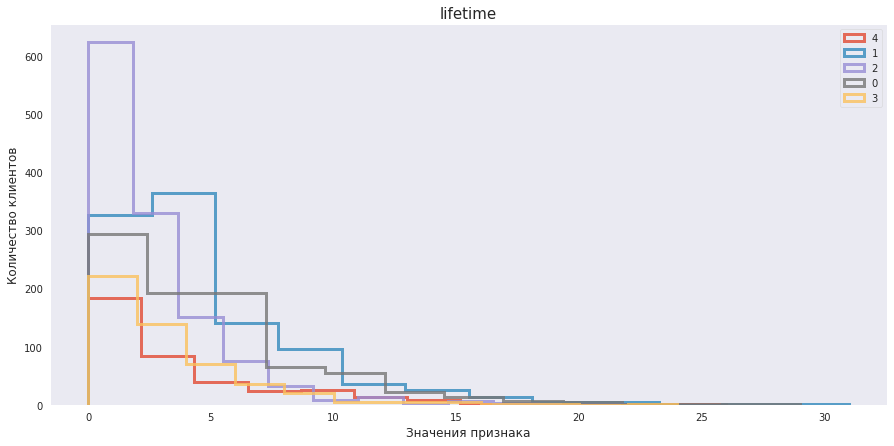

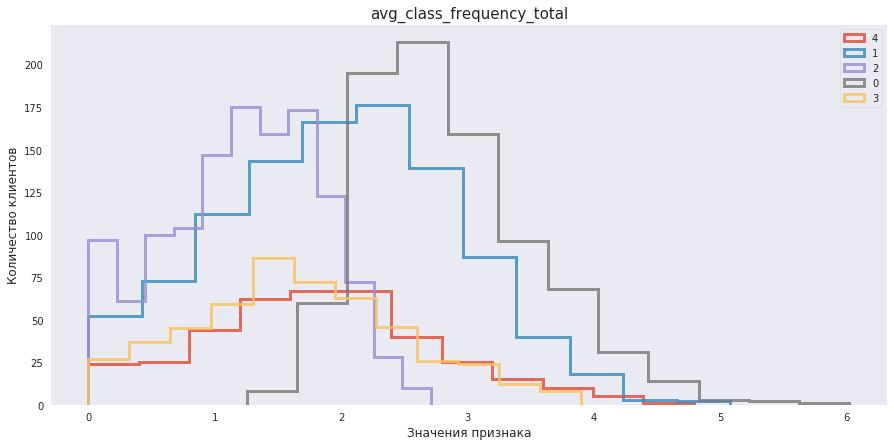

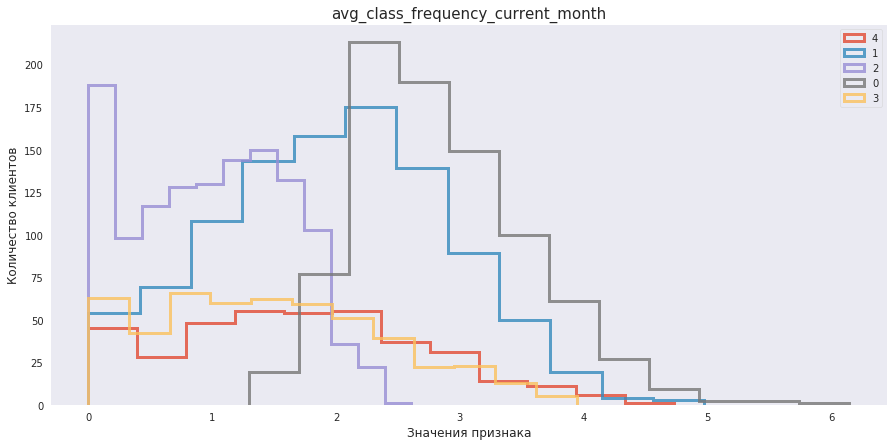

In [39]:
quantitative_columns = ['avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month']
for col in quantitative_columns:
    plt.figure(figsize=(15, 7))
    
    for cluster in cluster_df['cluster'].unique():
        sns.distplot(cluster_df[cluster_df['cluster']==cluster][col], bins = 12, label=cluster, 
                     kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.8})
        
    plt.title(label = col, fontsize = 15)
    plt.ylabel('Количество клиентов', fontsize = 12)
    plt.xlabel('Значения признака', fontsize = 12)
    plt.legend()
    plt.show()

Описание наиболее типичных представителей кластеров:  
**Кластер 0**
* клиент живет или работает в районе расположения фитнес-клуба,
* в клуб пришел самостоятельно (не использовал промо-код от знакомого и не является сотрудником компании-партнёра клуба),
* срок текущего абонемента - 1 месяц,
* интенсивно тренируется: 2-3 раза в неделю и темпов не сбавляет.

**Кластер 1** 
* клиент живет или работает в районе расположения фитнес-клуба,
* является сотрудником компании-партнёра клуба,
* использовал промо-код от знакомого при оплате первого абонемента,
* срок текущего абонемента самый большой - 12 месяцев,
* до окончания абонемента больше 10 месяцев, 
* посещал групповые занятия,
* 2 раза в неделю посещает спортзал.

**Кластер 2** 
* клиент живет или работает в районе расположения фитнес-клуба,
* в клуб пришел самостоятельно (не использовал промо-код от знакомого и не является сотрудником компании-партнёра клуба),
* срок текущего абонемента - 1 месяц,
* 1 раз в неделю посещает спортзал,
* групповые занятия не посещал,
* пользуется другими услугами фитнес-клуба (пришел недавно, а средняя выручка от других услуг равна 130).

**Кластер 3** 
* клиент не живет и не работает в районе расположения фитнес-клуба,
* не использовал промо-код от знакомого,
* срок текущего абонемента - 1 месяц,
* еще не посещал групповые занятия,
* 1-2 раза в неделю посещает спортзал.

**Кластер 4** 
* клиент живет или работает в районе расположения фитнес-клуба,
* отсутствует контактный телефон,
* срок текущего абонемента - 1 месяц,
* 1-2 раза в неделю посещает спортзал.

Для каждого полученного кластера посчитаем долю оттока и количество клиентов.

In [40]:
cluster_df.groupby('cluster')['churn'].agg(['mean', 'count'])

,mean,count
cluster,,
0,0.082353,850
1,0.027695,1011
2,0.509207,1249
3,0.443564,505
4,0.267532,385


Кластеры 2 и 3 склонны к оттоку, а 1 и 0 наиболее надежны.

### Вывод <a class="tocSkip">
Построили матрицу расстояний и нарисовали дендрограмму: оптимальное число кластеров - 4. Обучили модель кластеризации на основании алгоритма K-Means с числом кластеров = 5 и спрогнозировали кластеры клиентов. Изучили средние значения  и распределения признаков для кластеров. Для финальной кластеризации убрали признаки, по которым кластеры не имели различий - пол, возраст, наличие телефона.
    
Судя по доле оттока для каждого кластера, самыми надежными являются клиенты, живущие или работающие в районе клуба, сотрудники компании-партнера, которые приобрели годовой абонемент и тренируются 2 раза в неделю, а также посещают групповые занятия (кластер 1), а также клиенты, живущие или работающие в районе клуба, пришедшие в клуб самостоятельно, которые часто посещают спортзал (кластер 0). Скорее всего эти клиенты более заинтересованы в получении индивидуальных результатов (например, спортивная подготовка или снижение веса), поэтому доля оттока среди них меньше 1%.

Клиенты следующих кластеров склонны к оттоку: 2 - более 50% клиентов ушли в отток, 3 - 44% ушедших в отток, 4 - 27% ушли в отток. При этом кластер 2 самый многочисленный. Клиенты этого кластера приобрели абонемент на месяц, раз в неделю посещают спортзал и активно пользуются другими услугами клуба. В отличие от клиентов 2 кластера, попавших в 3 кластер объединяет то, что фитнес-клуб находится далеко от места их проживания и работы. Такие клиенты останутся при высоких качествах услуг и тесных коммуникациях с тренерами и администраторами фитнес-клуба. У клиентов 4 кластера отсутствует контактный телефон, возможно таким образом клиенты стремяться избежать звонков с предложениями и рекомендациями от клуба.

## Выводы и рекомендации <a id="conclusion"></a>

Цель данного исследования — провести анализ и подготовить план действий по удержанию клиентов в сети фитнес-центров «Культурист-датасаентист». В распоряжении сведения о 4000 клиентах клуба, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 

Работа проведена по этапам:
1. **Исследовательский анализ данных.** В ходе данного этапа были изучены средние значения и стандартные отклонения признаков; средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался; построены диаграммы распределения признаков для тех, кто ушёл и тех, кто остался; построена матрицу корреляций.  
    
Исходя из корреляций предсказали наиболее ценные признаками для модели:  
* время с момента первого посещения фитнес-клуба,   
* средняя частота посещений в неделю за предыдущий месяц,  
* возраст,   
* длительность текущего действующего абонемента,   
* срок до окончания текущего действующего абонемента.   
    
Для построения модели прогнозирования оттока клиентов создана новая таблица `df_no_corr_features`, в которой удалены признаки, не влияющие на отток клиентов - `gender`, `phone`; а также признаки, сильно скоррелированные между собой. На основе последних созданы новые признаки:
* На основе длительности текущего абонемента в месяцах и срока до окончания действующего абонемента в месяцах создали поле `contract_period_tr`, значения которого уникальны для каждой пары `contract_period` + `month_to_end_contract`.
* Среднюю частоту посещений в неделю за весь период и среднюю частоту посещений в неделю за предыдущий месяц заменили на изменение средней частоты посещений в неделю за предыдущий месяц по сравнению с частотой за весь период. 

Для решения задачи прогнозирования оттока клиентов выбраны алгоритмы **Логистическая регрессия** и **Случайный лес**, т.к. она относится к задачам обучения с учителем: бинарная классификация. Для оценки моделей выбраны метрики **accuracy** (доля правильных ответов), **precision** (точность), **recall** (полнота) и **roc_auc**. Так как удержание клиента является приоритетной задачей, то целевой метрикой выбрана **recall**: оценвается доля найденных классификатором клиентов, ушедших в отток, относительно всех ушедших в отток.
    
2. **Построение модели прогнозирования оттока клиентов.** Построили модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце, и обучили модель логистической регрессией и случайным лесом.

Наилучшие метрики дает модель случайного леса, построенная на данных без скоррелированных признаков с числом деревьев = 80. Показатель целевой метрики (полноты) этой модели 0,87 (87% ушедших в отток обнаружены с помощью модели).  При этом доля правильных ответов: 95%, точность = 0,95 (95% правильных ответов среди тех, кого модель отнесла к ушедшим в отток), оценка качества модели - 98%.

Наиболее важными признаками для модели оказались:
* изменение средней частоты посещений в неделю,
* время с момента первого обращения в фитнес-центр, 
* возраст клиента.
    
3. **Кластеризация клиентов.** Построили матрицу расстояний и нарисовали дендрограмму: оптимальное число кластеров - 4. Обучили модель кластеризации на основании алгоритма K-Means с числом кластеров = 5 и спрогнозировали кластеры клиентов. Изучили средние значения  и распределения признаков для кластеров. Для финальной кластеризации убрали признаки, по которым кластеры не имели различий - пол, возраст.
    
Судя по доле оттока для каждого кластера, самыми надежными являются клиенты 1 и 0 кластеров, наиболее типичных представителей которых можно описать следующим образом:
* 1 кластер: 
    * клиент живет или работает в районе расположения фитнес-клуба,
    * является сотрудником компании-партнёра клуба,
    * использовал промо-код от знакомого при оплате первого абонемента,
    * срок текущего абонемента самый большой - 12 месяцев,
    * до окончания абонемента больше 10 месяцев, 
    * посещал групповые занятия,
    * 2 раза в неделю посещает спортзал;
* 0 кластер:
    * клиент живет или работает в районе расположения фитнес-клуба,
    * в клуб пришел самостоятельно (не использовал промо-код от знакомого и не является сотрудником компании-партнёра клуба),
    * срок текущего абонемента - 1 месяц,
    * интенсивно тренируется: 2-3 раза в неделю и темпов не сбавляет.  
    
Скорее всего эти клиенты более заинтересованы в получении индивидуальных результатов (например, спортивная подготовка или снижение веса), поэтому доля оттока среди них меньше 1%.

Клиенты следующих кластеров склонны к оттоку: 2 - более 50% клиентов ушли в отток, 3 - 44% ушедших в отток, 4 - 27% ушли в отток. При этом кластер 1 самый многочисленный. Наиболее типичных представителей данных кластеров можно описать следующим образом:
* 2 кластер:
    * клиент живет или работает в районе расположения фитнес-клуба,
    * в клуб пришел самостоятельно (не использовал промо-код от знакомого и не является сотрудником компании-партнёра клуба),
    * срок текущего абонемента - 1 месяц,
    * 1 раз в неделю посещает спортзал,
    * групповые занятия не посещал,
    * пользуется другими услугами фитнес-клуба (пришел недавно, а средняя выручка от других услуг равна 130);
* 3 кластер:
    * клиент не живет и не работает в районе расположения фитнес-клуба,
    * не использовал промо-код от знакомого,
    * срок текущего абонемента - 1 месяц,
    * еще не посещал групповые занятия,
    * 1-2 раза в неделю посещает спортзал;
* 4 кластер:
    * клиент живет или работает в районе расположения фитнес-клуба,
    * отсутствует контактный телефон,
    * срок текущего абонемента - 1 месяц,
    * 1-2 раза в неделю посещает спортзал.
    

**Рекомендации для стратегии взаимодействия с клиентами и их удержания:**

Клиентов, склонных к оттоку, объединяют следующие признаки: абонемент приобретен на 1 месяц, редко посещает фитнес-центр и скорее всего никогда не посещал групповые занятия. 
Для удержания клиентов рекомендую:
* расширить коммуникации клиента с другими участниками: активное общение с менеджером  и тренером, вовлечение в групповые занятия. Чем крепче личные связи с клиентами, тем ниже вероятность, что они уйдут в другой клуб.
* использовать поощрение клиентов за небольшие успехи: ввести систему баллов и наград за посещения (например, бесплатный коктейль в баре в обмен на накопленные баллы), запустить программу лояльности (например, клиентам, посещающим фитнес-центр больше 6 месяцев, предлагать дополнительные услуги клуба по специальным ценам).
* демонстрировать клиенту его достижения: определять цель тренировок, составлять индивидуальные планы и дневники, или устраивать фитнес-марафоны.
* периодически приглашать клиента на процедуры и клубные мероприятия, которые могут быть ему полезны в достижении своих целей. Это может носить характер продажи, а может быть просто частью рекомендаций по повышению эффективности тренировочного плана клиента.

Эти меры в первую очередь должны быть направлены на клиентов 2 кластера, который включает наибольшее количество людей и имеет долю оттока больше 50%. Они также могут быть эффективны и для клиентов 4 кластера. Но  в отличие от клиентов этих кластеров, попавших в 3 кластер объединяет то, что фитнес-клуб находится далеко от места их проживания и работы. Возможно для них не подойдут поощрения за небольшие успехи и приглашения на клубные процедуры и мероприятия, клиенты останутся при высоких качествах услуг и тесных коммуникациях с тренерами и администраторами фитнес-клуба.